<h2 style='color:SeaGreen; font-family:cursive;'>Задача 1: сравнение предложений</h2>

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные);
* UNIX-утилита cat для вывода содержимого файлов;
* версии операционной системы OS X, названные в честь семейства кошачьих.

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?
Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

**Чтение строк с приведением к нижнему регистру:**

1. Скачайте файл с предложениями (sentences.txt).

2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import re
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.spatial.distance import cdist

In [2]:
with open('sentences.txt', 'r', encoding='utf-8') as file:
    lines = [i.lower() for i in file] # Чтение строк и преобразование их к нижнему регистру

lines[1]

'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n'

**Токенизация:**

3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [3]:
lines_words = []

for i in range(len(lines)):
    words = [word for word in re.split('[^a-z]', lines[i]) if word] # Разбитие строк на слова с удаление пустых элементов
    lines_words.append(words)

print(f'Количество строк = {len(lines_words)}')

Количество строк = 22


**Кодирование слов:**

4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [4]:
dict_encoding_words = {}

number_word = 0

for line in lines_words:
    for word in line:
        if word not in dict_encoding_words:
            dict_encoding_words[word] = number_word
            number_word += 1

print(f'Число слов в предложениях = {len(dict_encoding_words)}')

Число слов в предложениях = 254


**Формирование матрицы:**

5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [5]:
matrix = []

for line in lines_words:
    word_code = np.array([line.count(word) for word in dict_encoding_words.keys()], dtype='int')
    matrix.append(word_code)
    
matrix = np.array(matrix, dtype="object")

**Нахождение косинусного расстояния:**

6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [6]:
for i in range(matrix.shape[0]):
    lenght = cdist(matrix[0:1], matrix[0 + i:i + 1], metric='cosine')[0]
    print(f'Сходство для строки {i} = {lenght}')

Сходство для строки 0 = [0.]
Сходство для строки 1 = [0.95275444]
Сходство для строки 2 = [0.86447381]
Сходство для строки 3 = [0.89517152]
Сходство для строки 4 = [0.77708871]
Сходство для строки 5 = [0.94023857]
Сходство для строки 6 = [0.73273876]
Сходство для строки 7 = [0.92587507]
Сходство для строки 8 = [0.88427249]
Сходство для строки 9 = [0.90550888]
Сходство для строки 10 = [0.83281654]
Сходство для строки 11 = [0.88047714]
Сходство для строки 12 = [0.83964325]
Сходство для строки 13 = [0.87035926]
Сходство для строки 14 = [0.87401184]
Сходство для строки 15 = [0.94427218]
Сходство для строки 16 = [0.84063619]
Сходство для строки 17 = [0.9566445]
Сходство для строки 18 = [0.94427218]
Сходство для строки 19 = [0.88854436]
Сходство для строки 20 = [0.84275727]
Сходство для строки 21 = [0.82503645]


7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса.

<h2 style='color:SeaGreen; font-family:cursive;'>Задача 2: аппроксимация функции</h2>

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$f(x) = \sin(x / 5) \cdot \exp(x / 10) + 5 \exp(-x / 2)$

In [7]:
x = np.arange(1, 15, 0.1)

# Функция
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x / 2)

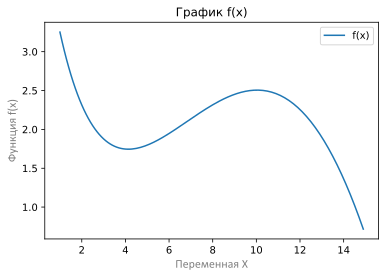

In [8]:
plt.plot(x, f(x))

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)'])

plt.show()

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени $n$ (то есть $w_0 + w_1 x + w_2 x^2 + \ldots + w_n x^n$) однозначно определяется любыми $n + 1$ различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, \ldots, w_n$ можно определить из следующей системы линейных уравнений:

$\large
\begin{equation*}
 \begin{cases}
   w_0 + w_1 x_1 + w_2 x_1^2 + \ldots + w_n x_1^n = f(x_1)\\
   \ldots\\
   w_0 + w_1 x_{n+1} + w_2 x_{n+1}^2 + \ldots + w_n x_{n+1}^n = f(x_{n+1})
 \end{cases}
\end{equation*}
$

где через $x_1, \ldots, x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), \ldots, f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

<h2 align='center'>Решение:</h2>

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Запишем систему:

$\large
\begin{equation*}
 \begin{cases}
   w_0 + w_1 \cdot 1 = f(1)\\
   w_0 + w_1 \cdot 15 = f(15)
 \end{cases}
\end{equation*}
$

**Поиск оптимальных весов**

In [9]:
# Задаём матрицу системы линейных уравнений
a = np.array([[1, 1], [1, 15]])

# Задаём значения, которые должны получиться при умножении матрицы на вектор
b = np.array([f(1), f(15)])

# Нахождение весов
weights = linalg.solve(a, b)
weights

array([ 3.43914511, -0.18692825])

**Функция регрессии - аппроксимация**

In [10]:
def f_1(w:list, x):
    return w[0] + w[1] * x

In [11]:
predict_1 = [f_1(weights, i) for i in x]

**Строим график**

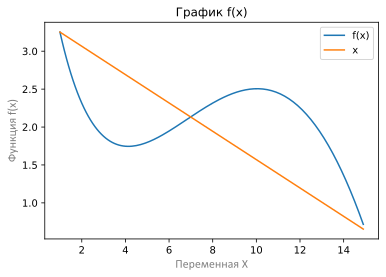

In [12]:
plt.plot(x, f(x))
plt.plot(x, predict_1)

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)', 'x'])

plt.show()

2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

Запишем систему:

$\large
\begin{equation*}
 \begin{cases}
   w_0 + w_1 \cdot 1 + w_2 \cdot 1^2 = f(1)\\
   w_0 + w_1 \cdot 8 + w_2 \cdot 8^2 = f(8)\\
   w_0 + w_1 \cdot 15 + w_2 \cdot 15^2 = f(15)
 \end{cases}
\end{equation*}
$

**Поиск оптимальных весов**

In [13]:
# Задаём матрицу системы линейных уравнений
a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])

# Задаём значения, которые должны получиться при умножении матрицы на вектор
b = np.array([f(1), f(8), f(15)])

# Нахождение весов
weights = linalg.solve(a, b)
weights

array([ 3.32512949, -0.06531159, -0.00760104])

**Функция регрессии - аппроксимация**

In [14]:
def f_2(w:list, x):
    return w[0] + w[1] * x + w[2] * x**2

In [15]:
predict_2 = [f_2(weights, i) for i in x]

**Строим график**

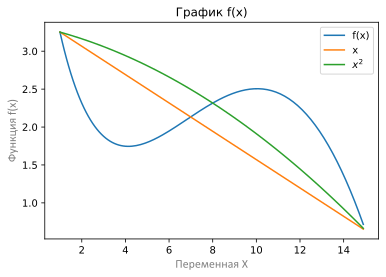

In [16]:
plt.plot(x, f(x))
plt.plot(x, predict_1)
plt.plot(x, predict_2)

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)', 'x', '$x^2$'])

plt.show()

3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

Запишем систему:

$\large
\begin{equation*}
 \begin{cases}
   w_0 + w_1 \cdot 1 + w_2 \cdot 1^2 + w_3 \cdot 1^3 = f(1)\\
   w_0 + w_1 \cdot 4 + w_2 \cdot 4^2 + w_3 \cdot 4^3 = f(4)\\
   w_0 + w_1 \cdot 10 + w_2 \cdot 10^2 + w_3 \cdot 10^3= f(10)\\
   w_0 + w_1 \cdot 15 + w_2 \cdot 15^2 + w_3 \cdot 15^3 = f(15)  
 \end{cases}
\end{equation*}
$

**Поиск оптимальных весов**

In [17]:
# Задаём матрицу системы линейных уравнений
a = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])

# Задаём значения, которые должны получиться при умножении матрицы на вектор
b = np.array([f(1), f(4), f(10), f(15)])

# Нахождение весов
weights = linalg.solve(a, b)
weights

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

**Функция регрессии - аппроксимация**

In [18]:
def f_3(w:list, x):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3

In [19]:
predict_3 = [f_3(weights, i) for i in x]

**Строим график**

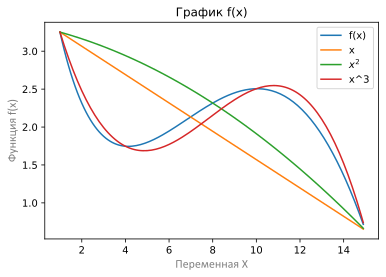

In [20]:
plt.plot(x, f(x))
plt.plot(x, predict_1)
plt.plot(x, predict_2)
plt.plot(x, predict_3)

title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': 12, 'color': '#808080', 'family': 'Calibri'}

plt.title('График f(x)')
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['f(x)', 'x', '$x^2$', 'x^3'])

plt.show()

4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).